# **🏠 HOUSE PRICE PREDICTION USING REGRESSION TECHNIQUES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.special as sps
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

**LOAD HOUSE PRICE DATASET**

In [2]:
import pandas as pd

# Path to the dataset
data ='/content/HousePricePrediction.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(data)

In [3]:
df.shape

(2919, 13)

In [4]:
df.head(10)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
5,5,50,RL,14115,Inside,1Fam,5,1993,1995,VinylSd,0.0,796.0,143000.0
6,6,20,RL,10084,Inside,1Fam,5,2004,2005,VinylSd,0.0,1686.0,307000.0
7,7,60,RL,10382,Corner,1Fam,6,1973,1973,HdBoard,32.0,1107.0,200000.0
8,8,50,RM,6120,Inside,1Fam,5,1931,1950,BrkFace,0.0,952.0,129900.0
9,9,190,RL,7420,Corner,2fmCon,6,1939,1950,MetalSd,0.0,991.0,118000.0


In [5]:
df.tail(10)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
2909,2909,180,RM,1470,Inside,Twnhs,6,1970,1970,CemntBd,0.0,630.0,NaN
2910,2910,160,RM,1484,Inside,TwnhsE,4,1972,1972,CemntBd,0.0,546.0,NaN
2911,2911,20,RL,13384,Inside,1Fam,5,1969,1979,Plywood,344.0,1104.0,NaN
2912,2912,160,RM,1533,Inside,Twnhs,5,1970,1970,CemntBd,0.0,546.0,NaN
2913,2913,160,RM,1526,Inside,Twnhs,5,1970,1970,CemntBd,0.0,546.0,NaN
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN
2918,2918,60,RL,9627,Inside,1Fam,5,1993,1994,HdBoard,0.0,996.0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [7]:
df.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


This shows the descriptive statistics of the numerical features. Few things to note from this are-

*   LotArea feature indicates lot size in square feet showing a minimum value of 1300 and a maximum of 215245. The mean 10168,11 is slightly higher than the median 9453
*   YearBuilt feature ranges from 1872 to 2010, indicating a diverse age of properties in the dataset. YearRemodAdd indicates remodeling year ranging from 1950 to 2010.
*   BsmtFinSF2 and TotalBsmtSF features represent basement areas. BsmtFinSF2 has a median of 0, and TotalBsmtSF also has a minimum value of 0, suggesting that many houses may not have a basement or a finished basement. The TotalBsmtSF feature's mean is 1051,7 which is slightly higher than its median 989,5 indicating that it is slightly right-skewed.


**EXPLORATORY DATA ANALYSIS (EDA)**

In [8]:
# Find categorical features (dtype is 'object' or 'category')
cat_cols = [col for col in df.columns if df[col].dtype == 'object' or df[col].dtype.name == 'category']
print("Categorical features:", len(cat_cols))
print(cat_cols)

# Find numerical features (dtype can be int64 or float64)
num_cols = [col for col in df.columns if df[col].dtype in ['int64','float64']]
print("\nNumerical Features:", len(num_cols))
print(num_cols)

Categorical features: 4
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

Numerical Features: 9
['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice']


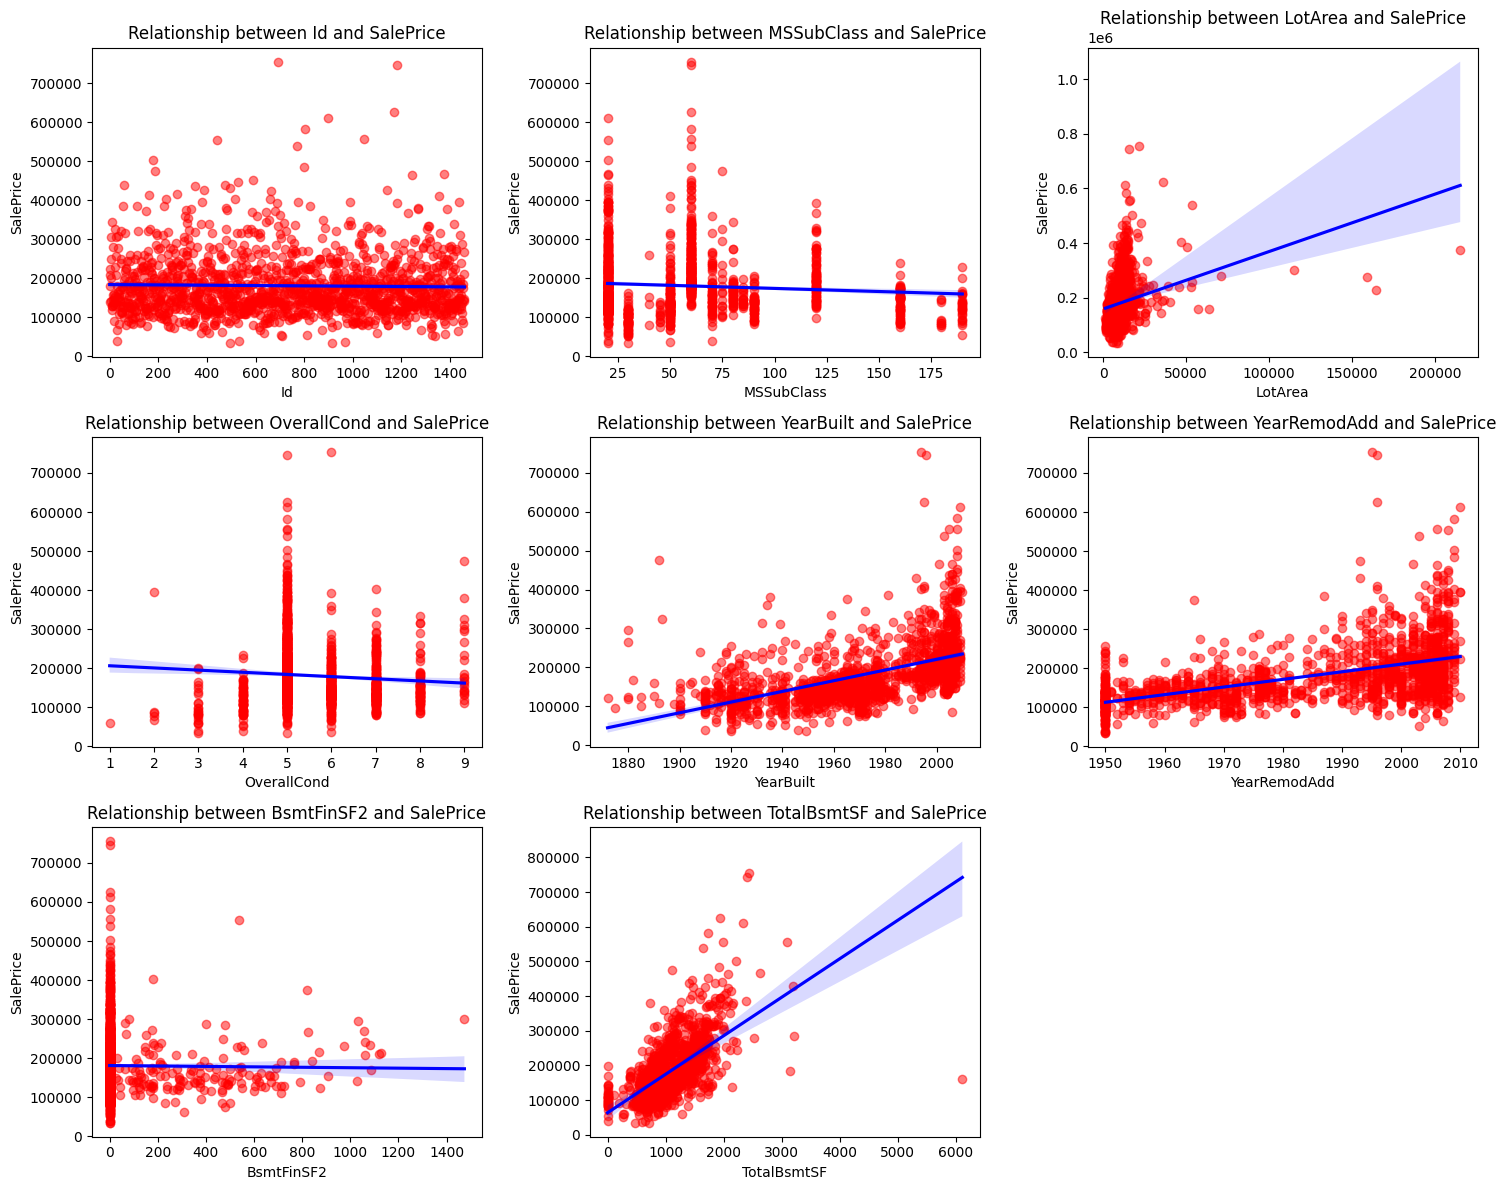

In [9]:
# Visualize the relationship between numerical features and the target variable 'SalePrice'
num_cols = ['Id','MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i,col in enumerate(num_cols):
    sns.regplot(x=df[col], y=df['SalePrice'], scatter_kws={'alpha':0.5, 'color':'red'}, line_kws={'color':'blue'}, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('SalePrice')
    axes[i].set_title(f'Relationship between {col} and SalePrice')


# Hide empty subplots if grid > features
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

From the regression plots, it can be referred that-

*  The regression line is nearly horizontal for MSSubClass, OverallCond, and BsmtFinSF2, and the scatter points are widely dispersed. These have weak relationship with the target variable 'SalePrice'.
*  There exists a positive linear relationship between target variable 'SalePrice' and the features 'LotArea', 'YearBuilt', 'YearRemodAdd', and 'TotalBsmtSF'. The increase in these feature values are also resulting in SalePrice increase which can also be visually confirmed by the upward-sloping regression line. The confidence interval is relatively narrow for these plots, suggesting the linear relationship is statistically significant.

In [10]:
import pandas as pd
import plotly.express as px
import numpy as np

num_col= ['Id','MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF','SalePrice']

# Calculate the correlation matrix
correlation_matrix = df[num_col].corr()

# Create a dynamic heatmap using Plotly
fig = px.imshow(
    correlation_matrix,
    text_auto=".2f",
    color_continuous_scale='BrBg',
    zmin=-1,  # Minimum value for the color scale
    zmax=1,   # Maximum value for the color scale
    labels=dict(x="Features", y="Features", color="Correlation"),
    title="Dynamic Correlation Matrix Heatmap"
)

# Customize the layout
fig.update_layout(
    xaxis_title="Features",
    yaxis_title="Features",
    width=800,  # Adjust width
    height=600, # Adjust height
    title_x=0.5  # Center the title
)

# Show the interactive heatmap
fig.show()

The heatmap shows that input features 'LotArea' and 'TotalBsmtSF' have positive correlation with target variable. 'YearBuilt' and 'YearRemodAdd' has a good positive correlation with 'SalePrice' having a value of 0.52 and 0.51 respectively.

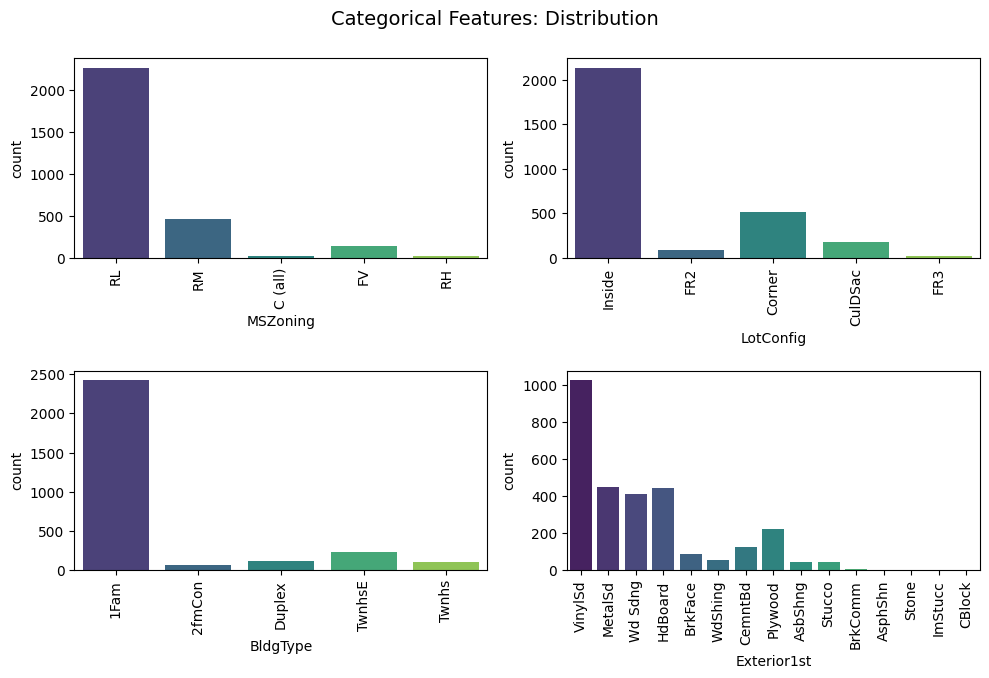

In [11]:
# Categorical features' distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 12))
plotnumber = 1
plt.suptitle("Categorical Features: Distribution", fontsize=14, y=1.00)

# Loop through each categorical column and create count plots
for column in cat_cols:
    if plotnumber <= len(cat_cols):  # Dynamically adjusts to the number of categorical columns
        ax = plt.subplot(4, 2, plotnumber)
        sns.countplot(data=df, x=column, ax=ax, palette='viridis')
        plt.xticks(rotation=90)
        plt.xlabel(column, fontsize=10)
        plt.ylabel("count", fontsize=10)

    plotnumber += 1

plt.tight_layout()
plt.show()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64


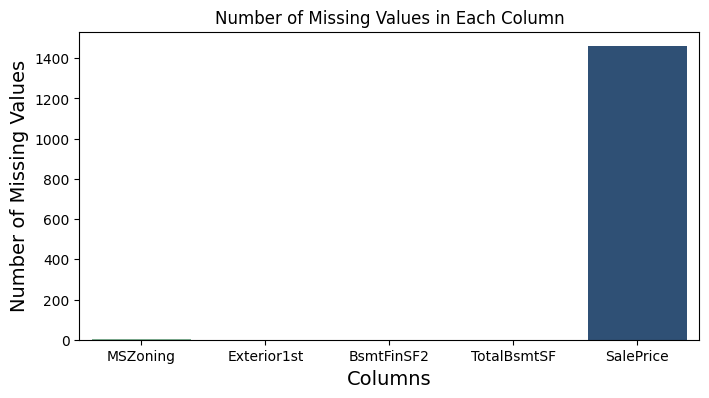

In [12]:
# Check for missing values (NaNs)
missing_values = df.isnull().sum()
print(missing_values)

# Filter columns that have missing values
missing_values = missing_values[missing_values > 0]

# Plot missing values
plt.figure(figsize=(8, 4))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="crest")
plt.xticks(rotation=0)
plt.title('Number of Missing Values in Each Column')
plt.ylabel('Number of Missing Values', fontsize=14)
plt.xlabel('Columns', fontsize=14)
plt.show()

In [13]:
# Check percentage of missing values
missing_values_percent=(df.isnull().sum()/df.shape[0]*100).round(3)
missing_values_percent

,0
Id,0.000
MSSubClass,0.000
MSZoning,0.137
LotArea,0.000
LotConfig,0.000
BldgType,0.000
OverallCond,0.000
YearBuilt,0.000
YearRemodAdd,0.000
Exterior1st,0.034


In [15]:
# Dataset after EDA
df_train = df[df['SalePrice'].notnull()].copy()  # train rows
df_test  = df[df['SalePrice'].isnull()].copy()   # test rows (SalePrice missing)

**TRAIN-TEST SPLIT**

In [16]:
# Keep test Id aside for submission file later
test_ids = df_test['Id']

In [17]:
from sklearn.model_selection import train_test_split

# Features and target for training
X = df_train.drop(['SalePrice', 'Id'], axis=1)
y = df_train['SalePrice']
df_test = df_test.drop(['SalePrice', 'Id'], axis=1)

# Split training data for model evaluation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**FINDING MISSING VALUES & MISSING VALUES IMPUTATION**

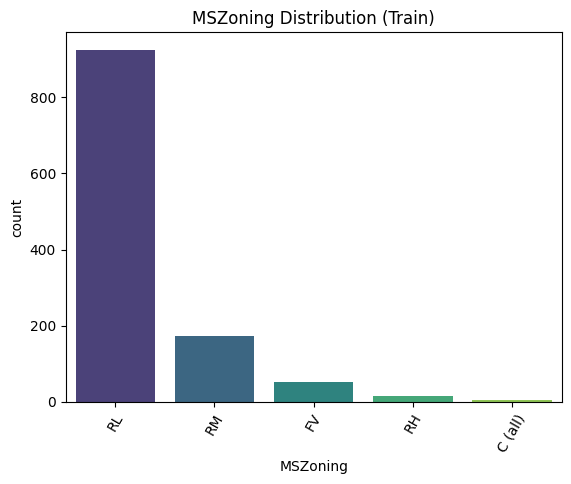

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualise the missing value counts for categorical variable MSZoning

X_train["MSZoning"].value_counts()

# Count plot in graph form
sns.countplot(x=X_train["MSZoning"], palette='viridis')
plt.xticks(rotation=60)
plt.title("MSZoning Distribution (Train)")
plt.show()

In [19]:
# Missing value imputation for MSZoning using mode
X_train['MSZoning'] = X_train['MSZoning'].fillna(X_train['MSZoning'].mode()[0]) ## Since RL is the mode
X_val["MSZoning"] = X_val["MSZoning"].fillna(X_train['MSZoning'].mode()[0])
df_test["MSZoning"] = df_test["MSZoning"].fillna(X_train['MSZoning'].mode()[0])

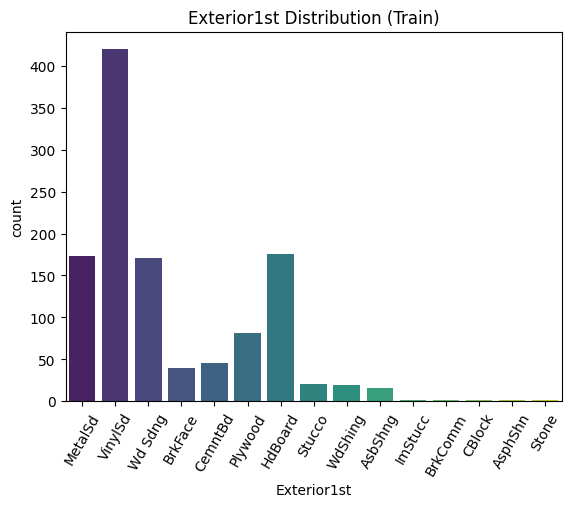

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualise the missing value counts for categorical variable Exterior1st

X_train["Exterior1st"].value_counts()

# Count plot in graph form
sns.countplot(x=X_train["Exterior1st"], palette='viridis')
plt.xticks(rotation=60)
plt.title("Exterior1st Distribution (Train)")
plt.show()

In [21]:
# Missing value imputation for Exterior1st using mode
X_train['Exterior1st'] = X_train['Exterior1st'].fillna(X_train['Exterior1st'].mode()[0]) ##Since VinylSd is the mode
X_val["Exterior1st"] = X_val["Exterior1st"].fillna(X_train['Exterior1st'].mode()[0])
df_test["Exterior1st"] = df_test["Exterior1st"].fillna(X_train['Exterior1st'].mode()[0])

In [22]:
# Calculate skewness for numerical columns
skewness = X_train[['BsmtFinSF2','TotalBsmtSF']].skew()

print("Skewness of numerical columns:")
print(skewness)

Skewness of numerical columns:
BsmtFinSF2     4.217895
TotalBsmtSF    1.723881
dtype: float64


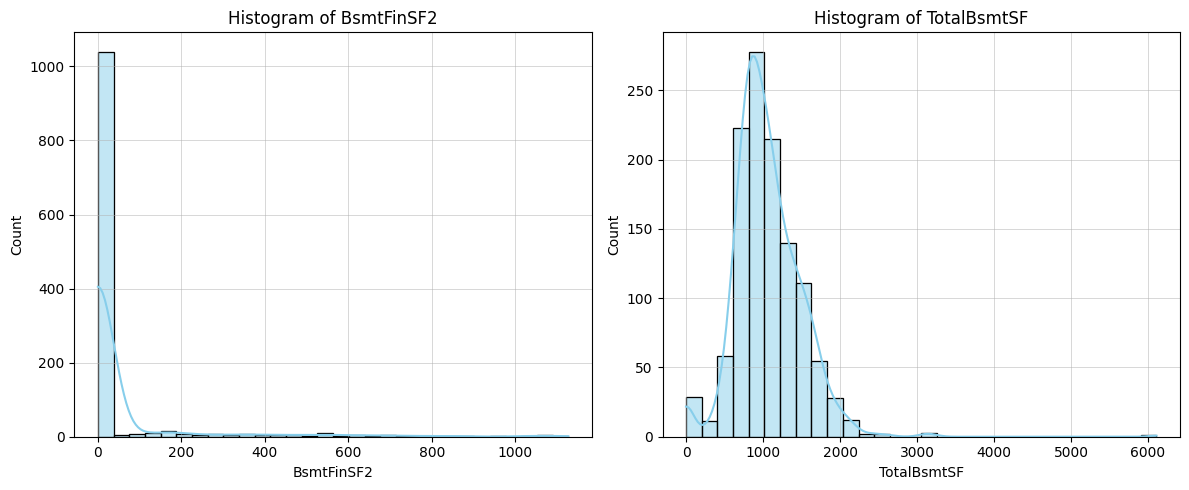

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to check
cols = ['BsmtFinSF2', 'TotalBsmtSF']

# Plot histograms with KDE curve
plt.figure(figsize=(12, 5))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 2, i)
    sns.histplot(X_train[col], kde=True, bins=30, color="skyblue", edgecolor="black")
    # Add grid lines
    plt.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)
    plt.title(f"Histogram of {col}",  fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

Both from skewness and histogram, it's evident that 'BsmtFinSF2', 'TotalBsmtSF'columns are rightly skewed, so missing values are imputed with median.

In [24]:
# Missing value imputation with median for numerical feature 'TotalBsmtSF'
X_train['TotalBsmtSF'] = X_train['TotalBsmtSF'].fillna(X_train['TotalBsmtSF'].median())
X_val['TotalBsmtSF'] = X_val['TotalBsmtSF'].fillna(X_train['TotalBsmtSF'].median())
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(X_train['TotalBsmtSF'].median())


# Missing value imputation with median for numerical feature 'BsmtFinSF2'
X_train['BsmtFinSF2'] = X_train['BsmtFinSF2'].fillna(X_train['BsmtFinSF2'].median())
X_val['BsmtFinSF2'] = X_val['BsmtFinSF2'].fillna(X_train['BsmtFinSF2'].median())
df_test['BsmtFinSF2'] = df_test['BsmtFinSF2'].fillna(X_train['BsmtFinSF2'].median())

**OUTLIER DETECTION & CAPPING OF OUTLIERS**

In [25]:
import pandas as pd
import numpy as np

def handle_outlier(X_train, X_val, df_test):
    """
    Simple IQR-based outlier detection and capping

    Parameters:
    -----------
    X_train : DataFrame - Training data
    X_val : DataFrame - Validation data
    df_test : DataFrame - Test data

    Returns:
    --------
    X_train_clean, X_val_clean, df_test_clean : Cleaned DataFrames
    """

    # Get numerical columns
    num_cols = ['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'BsmtFinSF2', 'TotalBsmtSF']

    # Make copies
    X_train_clean = X_train.copy()
    X_val_clean = X_val.copy()
    df_test_clean = df_test.copy()

    print(f"Treating outliers in {len(num_cols)} numerical columns...")

    # Process each numerical column
    for col in num_cols:
        # Calculate IQR bounds using TRAINING data only
        Q1 = X_train[col].quantile(0.25)
        Q3 = X_train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers in training data
        outliers = ((X_train[col] < lower_bound) | (X_train[col] > upper_bound)).sum()

        if outliers > 0:
            print(f"{col}: {outliers} outliers found, capping values")

            # Cap outliers in all datasets
            X_train_clean[col] = X_train_clean[col].clip(lower_bound, upper_bound)
            X_val_clean[col] = X_val_clean[col].clip(lower_bound, upper_bound)
            df_test_clean[col] = df_test_clean[col].clip(lower_bound, upper_bound)

    print("Outlier handling done")
    return X_train_clean, X_val_clean, df_test_clean


# Apply outlier handling part
X_train_clean, X_val_clean, df_test_clean = handle_outlier(X_train, X_val, df_test)


# Cleaned data ready for modelling
print(f"Training shape: {X_train_clean.shape}")
print(f"Validation shape: {X_val_clean.shape}")
print(f"Test shape: {df_test_clean.shape}")

Treating outliers in 6 numerical columns...
MSSubClass: 84 outliers found, capping values
LotArea: 54 outliers found, capping values
OverallCond: 99 outliers found, capping values
YearBuilt: 5 outliers found, capping values
BsmtFinSF2: 131 outliers found, capping values
TotalBsmtSF: 47 outliers found, capping values
Outlier handling done
Training shape: (1168, 11)
Validation shape: (292, 11)
Test shape: (1459, 11)


Here, using the IQR(Inter-Quartile Range) method the outliers are detected. The outlier boundaries are only calculated on the training data and then applied those same boundaries to the validation and test sets to prevent data leakage. After that, using Winsorization technique, extreme values are capped. Then the cleaned data is ready for modelling.

**MODEL TRAINING & PERFORMANCE METRICS**

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score


# One-hot encoding
X_train = pd.get_dummies(X_train_clean, drop_first=True)
X_val   = pd.get_dummies(X_val_clean, drop_first=True)
df_test = pd.get_dummies(df_test_clean, drop_first=True)

# Align columns to handle any missing columns in test or validation sets
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
df_test = df_test.reindex(columns=X_train.columns, fill_value=0)

# Initialize regression models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train models and evaluate

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    mape = mean_absolute_percentage_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)

    print(f"--- {name} ---")
    print(f"MAPE : {mape:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2  : {r2:.2f}\n")

--- Linear Regression ---
MAPE : 0.20
RMSE: 51756.28
R2  : 0.65

--- Random Forest ---
MAPE : 0.14
RMSE: 39690.64
R2  : 0.79

--- Gradient Boosting ---
MAPE : 0.14
RMSE: 37588.50
R2  : 0.82



For model training, 3 regression models such as Random Forest Regressor, Linear Regressor, and Gradient Boosting Regressor are used here. For calculating loss, mean_absolute_percentage_error is used. Both, RF and GB has the least mean absolute error of value 0.14 compared to Linear Regression with value of 0.20.
Another metric, R² value, measuring how much of the variance in SalePrice, is highest for the ensemble models. Gradient Boosting has an R² of 0.82, and Random Forest has an R² of 0.79, compared to Linear Regression's 0.65. This indicates that the ensemble models are capturing more of the underlying patterns in the data.
Metric Root Mean Square Error (RMSE), is representing the average prediction error in dollars. Gradient Boosting has an RMSE of approximately 37588 dollar and Random Forest has an RMSE of 39690 dollar, while Linear Regression's error is much higher at 51756 dollar.
In terms of 3 metrics, GB performs best compared to other two showing highest predictive power and the lowest average error.


In [27]:
# Train final model on full training data

# Choose the best model GB
final_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
final_model.fit(X_train, y_train)

# Predict SalePrice for test set, df_test has been preprocessed and aligned with training columns
y_test_pred = final_model.predict(df_test)

# Create submission DataFrame
submission = pd.DataFrame({
    'Id': df[df['SalePrice'].isnull()]['Id'],  # Ids of test rows
    'SalePrice': y_test_pred
})

# Save to CSV
submission['SalePrice'] = submission['SalePrice'].round(2)
submission.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")

Submission file created: submission.csv


Finally, in submission.csv, SalePrice is predicted for the test sets.